<a href="https://colab.research.google.com/github/grace-gg/neur-225/blob/main/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>. 

4. In a new *Code Cell*, run the following line of code to get rid of empty values:

<code>patch_seq['ISI'] = patch_seq['ISI'].fillna(0)</code>

5. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

6. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

7. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

8. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

9. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

10. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential? 

11. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

12. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

13. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>. 

14. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>. 

15. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

16. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

17. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test. 

18. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

19. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

20. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




###Grace Gallagher
*Intro to Neural Data Analysis*
**March 24th, 2023**



In [1]:
#Create a Code Cell that imports relevant modules - specifically, pandas as pd, matplotlib.pyplot as plt, and scipy.stats as stats.
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#For this assignment, you'll be using the patch_seq_expanded.csv file located in our class GitHub repo. Create a Code Cell that loads this file in as a Pandas dataFrame called patch_seq.
url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/patch_seq_expanded.csv'
patch_seq = pd.read_csv(url)
patch_seq

,ISI,Fast_Trough,Marker
0,77.337143,-49.899998,Sst
1,17.177895,-44.462498,Sst
2,48.294737,-47.350002,Sst
3,8.980000,-45.656254,Sst
4,30.315385,-50.737499,Sst
...,...,...,...
360,11.052333,-54.743752,Pvalb
361,8.860360,-64.875008,Pvalb
362,9.192897,-51.312504,Pvalb
363,10.544731,-52.281254,Pvalb


In [3]:
#In a new Code Cell, run the following line of code to get rid of empty values:

patch_seq['ISI'] = patch_seq['ISI'].fillna(0)

Text(0, 0.5, 'Counts')

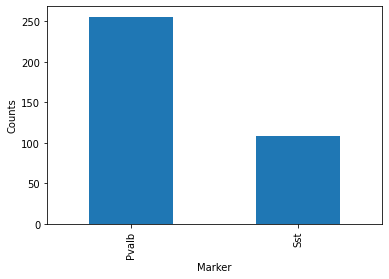

In [9]:
#In a new Code Cell, using the df.plot method from the pandas module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your patch_seq variable. Label your x and y-axes.
patch_seq['Marker'].value_counts().plot(kind='bar')
plt.xlabel('Marker')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

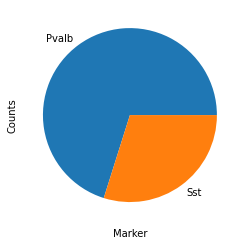

In [10]:
#In a new Code Cell, repeat step 4, but make a pie chart instead of a bar graph.
patch_seq['Marker'].value_counts().plot(kind='pie')
plt.xlabel('Marker')
plt.ylabel('Counts')

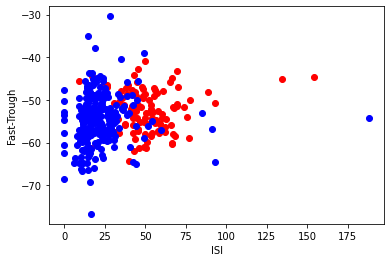

In [12]:
#In a new Code Cell, use a for loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your patch_seq dataframe. Your loop should make data points from "Sst" neurons red, and data points from "Pvalb" neurons blue.
patch_length = len(patch_seq)

for i in range(patch_length):
  if patch_seq.iloc[i,2] == 'Sst':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color='red')
  if patch_seq.iloc[i,2] == 'Pvalb':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color='blue')
  plt.xlabel('ISI')
  plt.ylabel('Fast-Trough')

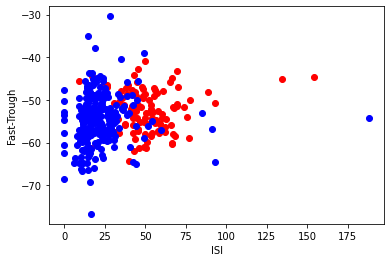

In [14]:
#In a new Code Cell, create a function called patchScatter() that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!
def patchScatter():
  patch_length = len(patch_seq)

  for i in range(patch_length):
    if patch_seq.iloc[i,2] == 'Sst':
      plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color='red')
    if patch_seq.iloc[i,2] == 'Pvalb':
      plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color='blue')
    plt.xlabel('ISI')
    plt.ylabel('Fast-Trough')

  plt.show()

patchScatter()


In [15]:
#In a new Code Cell, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the pandas method describe, like so:

patch_seq.groupby('Marker')['Fast_Trough'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


Describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential?

The "Pvalb" neurons have a slightly more negative mean than the "Sst" neurons but perhaps not enough of a difference to be significant. Thus, "Pvalb" neurons have a more negative undershoot following an action potential based on the mean and also the minimum value of -76.69. 

In [55]:
#In a new Code Cell, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the pandas method skew (follow the syntax in step 8 to apply this method to patch_seq).
patch_seq.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

In a new Markdown Cell, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

The Pvalb and Sst neurons both have skewness values between -0.5 and 0.5, thus, there is likely no skewness and the data represents a normal distribution for the Fast Trough column.

In [57]:
#In a new Code Cell, repeat step 10 for the "ISI" column of patch_seq.
patch_seq.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.200362
Sst      1.857850
Name: ISI, dtype: float64

In a new Markdown Cell, repeat step 11 for the "ISI" column of patch_seq.

Both Pvalb and Sst neurons have skewness values greater than 0.5 so the distribution is skewed and not normal for the ISI column of the data

In [59]:
#Finally, in a new Code Cell, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

sst_neurons = patch_seq[patch_seq['Marker']=='Sst']

#Use the same code to create another variable called pvalb_neurons. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']
stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])

Ttest_indResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585)

In a Markdown Cell, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

Since the pvalue is less than 0.05, the result is significantly significant and so the undershoot voltage does significantly differ between Sst and Pvalb neurons.

In [60]:
#In a new Code Cell, repeat step 14 for "ISI". You won't need to create new sst_neurons and pvalb_neurons variables - you'll just need to run a new t-test.
stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['ISI'])

Ttest_indResult(statistic=15.004913280678535, pvalue=6.160372584319923e-40)

In a new Markdown Cell, repeat step 15 for the results of your new t-test.

The results of this t-test show that the ISI does not significantly differ between Pvalb and Sst neurons because the pvalue is greater than 0.05.